In [1]:
import cf_xarray
import gribberish
import xarray as xr
import cfgrib

In [2]:
ds = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='gribberish')
ds

/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
dlopen(/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so, 0x0002): Library not loaded: /opt/homebrew/opt/gdal/lib/libgdal.31.dylib
  Referenced from: <096C1844-80F2-3F2D-82B6-4FA692E96B85> /Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so
  Reason: tried: '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/usr/local/lib/libgdal.31.dylib' (no such file), '/usr/lib/libgdal.31.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/gdal/3.6.2/lib/libgdal.31.dylib' (no such file), '/S

<xarray.Dataset>
Dimensions:                                                                       (
                                                                                   time: 1,
                                                                                   lat: 721,
                                                                                   lon: 1440)
Coordinates:
  * time                                                                          (time) datetime64[ns] ...
  * lat                                                                           (lat) float64 ...
  * lon                                                                           (lon) float64 ...
Data variables: (12/72)
    WINDF@groundorwater_0                                                         (time, lat, lon) float64 ...
    UGRD                                                                          (time, lat, lon) float64 ...
    UGRD@specificaltitudeabovemeansealevel_1829                                   (time, lat, lon) float64 ...
    PTEND@meansealevel_0                                                          (time, lat, lon) float64 ...
    UGRD@sigmalevel_1                                                             (time, lat, lon) float64 ...
    UGRD@specifiedheightlevelaboveground_100                                      (time, lat, lon) float64 ...
    ...                                                                            ...
    TMP@tropopause_0                                                              (time, lat, lon) float64 ...
    UGRD@maximumwindlevel_0                                                       (time, lat, lon) float64 ...
    TMP@specifiedheightlevelaboveground_2                                         (time, lat, lon) float64 ...
    DPT@specifiedheightlevelaboveground_2                                         (time, lat, lon) float64 ...
    TMP@specificaltitudeabovemeansealevel_2743                                    (time, lat, lon) float64 ...
    VGRD@specificaltitudeabovemeansealevel_3658                                   (time, lat, lon) float64 ...
Attributes:
    meta:     created with gribberish

In [14]:
gust = ds['GUST@groundorwater_0']
gust

<xarray.DataArray 'GUST@groundorwater_0' (time: 1, lat: 721, lon: 1440)>
[1038240 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2023-01-12T07:00:00
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    standard_name:  GUST
    long_name:      windgust
    units:          ms-1
    crs:            EPSG:4326

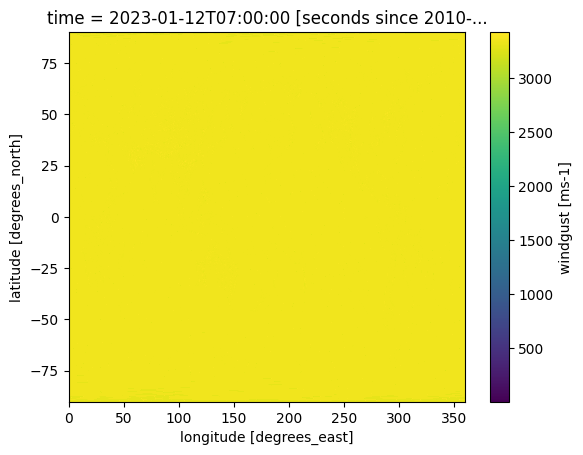

In [15]:
gust.plot()

In [9]:
ds_truth = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})
ds_truth

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Data variables: (12/32)
    vis         (latitude, longitude) float32 ...
    gust        (latitude, longitude) float32 ...
    hindex      (latitude, longitude) float32 ...
    sp          (latitude, longitude) float32 ...
    orog        (latitude, longitude) float32 ...
    t           (latitude, longitude) float32 ...
    ...          ...
    cape        (latitude, longitude) float32 ...
    cin         (latitude, longitude) float32 ...
    4lftx       (latitude, longitude) float32 ...
    hpbl        (latitude, longitude) float32 ...
    lsm         (latitude, longitude) float32 ...
    siconc      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-08T12:53 GRIB to CDM+CF via cfgrib-0.9.1...

In [13]:
gust_truth = ds_truth.gust
gust_truth

<xarray.DataArray 'gust' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260065
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Wind speed (gust)
    GRIB_shortName:                           gust
    GRIB_units:                               m s**-1
    long_name:                                Wind speed (gust)
    units:                                    m s**-1
    standard_name:                            unknown

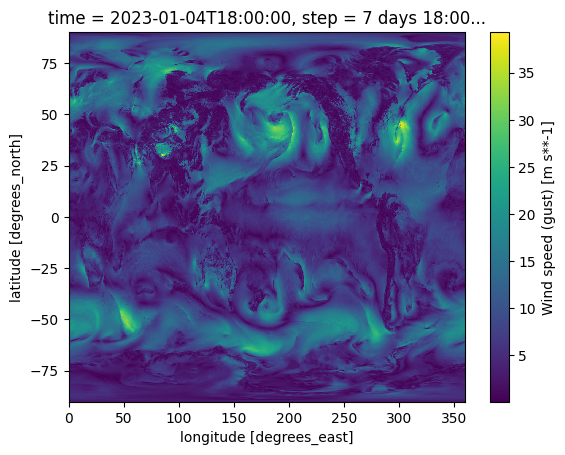

In [17]:
gust_truth.plot()

In [22]:
gust_truth.sel(latitude=41, longitude=-71, method='nearest').values

array(10.422778, dtype=float32)

In [24]:
gust.sel(lat=41, lon=-71, method='nearest').values

array([3346.22277833])